In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

# Placeholder

In [2]:
x = tf.placeholder(tf.int32, shape=[3], name='x')
y = tf.placeholder(tf.int32, shape=[3], name='y')

sum_x = tf.reduce_sum(x, name='sum_x')
prod_y = tf.reduce_prod(y, name='prod_y')

final_div = tf.div(sum_x, prod_y, name='final_div')
final_mean = tf.reduce_mean([sum_x, prod_y], name='final_mean')

sess = tf.Session()

print('sum(x): ', sess.run(sum_x, feed_dict={x: [100, 200, 300]}))
print('prod(y): ', sess.run(prod_y, feed_dict={y: [1, 2, 3]}))

writer = tf.summary.FileWriter('./tf1', sess.graph)

writer.close()
sess.close()

sum(x):  600
prod(y):  6


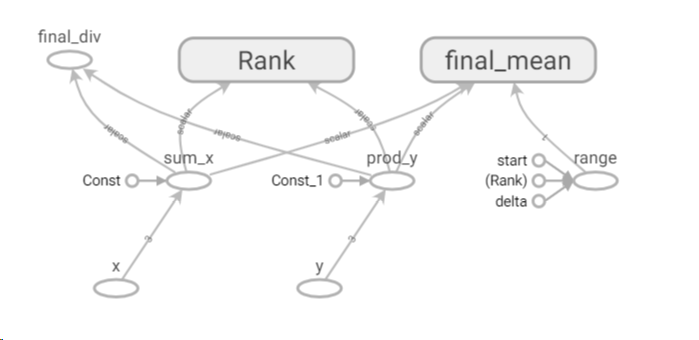

# Fetchs and Feed Dictionary

In [12]:
# y = Wx + b
W = tf.constant([10, 100], name='const_w')
x = tf.placeholder(tf.int32, name='x')
b = tf.placeholder(tf.int32, name='b')

Wx = tf.multiply(W, x, name='Wx')
y = tf.add(Wx, b, name='y')

# y_ = x-b
y_ = tf.subtract(x, b, name='y_')

with tf.Session() as sess:
    print('Intermediate results: Wx = ', sess.run(fetches = Wx, feed_dict={x:[3,33]}))
    print('Final result: Wx + b = ', sess.run(fetches = y, feed_dict={x: [5, 50], b: [7, 9]}))
    
    print('Two result = ', sess.run(fetches = [y, y_], feed_dict={x: [5, 50], b: [7,9]}))

writer = tf.summary.FileWriter('./tf2', sess.graph)
writer.close()

Intermediate results: Wx =  [  30 3300]
Final result: Wx + b =  [  57 5009]
Two result =  [array([  57, 5009]), array([-2, 41])]


# Variables

Variables are construct that allows us to change its value

In [13]:
# y = Wx + b
W = tf.Variable([2.5, 4.0], tf.float32, name='var_W')
x = tf.placeholder(tf.float32, name='x')
b = tf.Variable([5., 10.0], tf.float32, name='var_b')

y = W * x + b

# Initialize all variables defined
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print('Final result: Wx + b = ', sess.run(y, feed_dict={x: [10, 100]}))

Final result: Wx + b =  [ 30. 410.]


## Initialze a Single Variable

In [15]:
s = W * x

# Initialize only those variables that we need
init = tf.variables_initializer([W])

# with tf.Session() as sess:
#     sess.run(init)
#     ### Below line will throw an error because of uninitializing few dependent variables 
#     print('Will this work?: Wx + b = ', sess.run(y, feed_dict={x: [10, 100]}))

## Update Initialized Variable

In [21]:
number = tf.Variable(2)
multiplier = tf.Variable(1)

init = tf.global_variables_initializer()
result = number.assign(tf.multiply(number, multiplier))

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
        print('Result number * multiplier = ', sess.run(result))
        print('Increment multiplier, new value = ', sess.run(multiplier.assign_add(1)))

Result number * multiplier =  2
Increment multiplier, new value =  2
Result number * multiplier =  4
Increment multiplier, new value =  3
Result number * multiplier =  12
Increment multiplier, new value =  4
Result number * multiplier =  48
Increment multiplier, new value =  5
Result number * multiplier =  240
Increment multiplier, new value =  6
Result number * multiplier =  1440
Increment multiplier, new value =  7
Result number * multiplier =  10080
Increment multiplier, new value =  8
Result number * multiplier =  80640
Increment multiplier, new value =  9
Result number * multiplier =  725760
Increment multiplier, new value =  10
Result number * multiplier =  7257600
Increment multiplier, new value =  11


# Multiple graph in tensorflow

In [28]:
g1 = tf.Graph()

with g1.as_default():
    with tf.Session() as sess:
        # y = Ax + b
        A = tf.constant([5, 7], tf.int32, name = 'A')
        x = tf.placeholder(tf.int32, name='x')
        b = tf.constant([3, 4], tf.int32, name='b')
        
        y = A * x + b
        print(sess.run(y, feed_dict={x: [10, 100]}))
        assert y.graph is g1

g2 = tf.Graph()
with g2.as_default():
    with tf.Session() as sess:
        # y = Ax + b
        A = tf.constant([5, 7], tf.int32, name = 'A')
        x = tf.placeholder(tf.int32, name='x')
        y = tf.pow(A,x, name='y')
        print(sess.run(y, feed_dict={x: [3,5]}))
        assert y.graph is g2
        
# Default Default Graph
default_graph = tf.get_default_graph()
with tf.Session() as sess:
    A = tf.constant([5, 7], tf.int32, name = 'A')
    x = tf.placeholder(tf.int32, name='x')
    y = A + x
    print(sess.run(y, feed_dict={x: [3,5]}))
    print(y.graph is default_graph)
    

[ 53 704]
[  125 16807]
[ 8 12]
True


# Named Scope

In [2]:
# Without named Scope

A = tf.constant([4], tf.int32, name='A')
B = tf.constant([5], tf.int32, name='B')
C = tf.constant([6], tf.int32, name='C')

x = tf.placeholder(tf.int32, name='x')

# y = Ax^2 + Bx + c
Ax2_1 = tf.multiply(A, tf.pow(x,2), name='Ax2_1')
Bx = tf.multiply(B, x, name='Bx')
y1 = tf.add_n([Ax2_1, Bx, C], name='y1')

# y = Ax^2 + Bx^2
Ax2_2 = tf.multiply(A, tf.pow(x,2), name='Ax2_2')
Bx2 = tf.multiply(B, tf.pow(x, 2), name='Bx2')
y2 = tf.add_n([Ax2_2], name='y2')

y = y1 + y2

with tf.Session() as sess:
    print(sess.run(y, feed_dict={x: [10]}))
    
    writer = tf.summary.FileWriter('./tf3', sess.graph)
    writer.close()

[856]


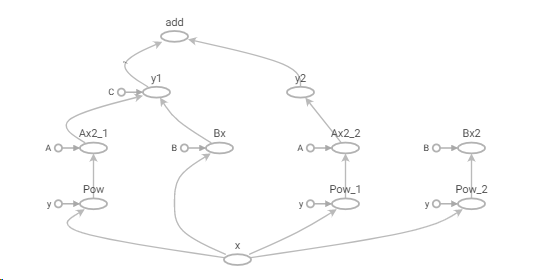

In [3]:
# With named Scope

A = tf.constant([4], tf.int32, name='A')
B = tf.constant([5], tf.int32, name='B')
C = tf.constant([6], tf.int32, name='C')

x = tf.placeholder(tf.int32, name='x')

# y = Ax^2 + Bx + c
with tf.name_scope("Equation_1"):
    Ax2_1 = tf.multiply(A, tf.pow(x,2), name='Ax2_1')
    Bx = tf.multiply(B, x, name='Bx')
    y1 = tf.add_n([Ax2_1, Bx, C], name='y1')

# y = Ax^2 + Bx^2
with tf.name_scope("Equation_2"):
    Ax2_2 = tf.multiply(A, tf.pow(x,2), name='Ax2_2')
    Bx2 = tf.multiply(B, tf.pow(x, 2), name='Bx2')
    y2 = tf.add_n([Ax2_2], name='y2')

with tf.name_scope("Final_Sum"):
    y = y1 + y2

with tf.Session() as sess:
    print(sess.run(y, feed_dict={x: [10]}))
    
    writer = tf.summary.FileWriter('./tf4', sess.graph)
    writer.close()

[856]


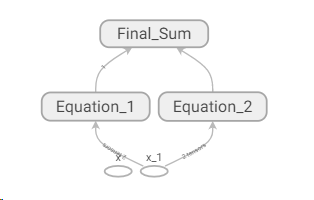

# Tips

We can start interactive Session in REPL Environment as below code.

```
sess = tf.InteractiveSession()

A = tf.constant([4], tf.int32, name='A')
x = tf.placeholder(tf.int32, name='x')

y = A * x

y.eval(feed_dist={x : [5]})
```